In [11]:
import pandas as pd
import ast
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [12]:
events_df = pd.read_csv('events_correct_predictions.csv')
events_df = events_df.drop("Unnamed: 0", axis=1)
events_df.shape

(2230, 7)

In [13]:
np.unique(events_df['Actual Label'])

array(['airport', 'bus', 'metro', 'metro_station', 'park',
       'public_square', 'shopping_mall', 'street_pedestrian',
       'street_traffic', 'tram'], dtype=object)

In [14]:
events_df.head()

Filename    Predicted Label  \
0  /work/aistwal/dataset_tau2019/extracted-files/...  street_pedestrian   
1  /work/aistwal/dataset_tau2019/extracted-files/...              metro   
2  /work/aistwal/dataset_tau2019/extracted-files/...  street_pedestrian   
3  /work/aistwal/dataset_tau2019/extracted-files/...     street_traffic   
4  /work/aistwal/dataset_tau2019/extracted-files/...            airport   

        Actual Label                                      events_before  \
0  street_pedestrian  ['Speech', 'Clip-clop', 'Animal', 'Run', 'Hors...   
1              metro  ['Train', 'Rail transport', 'Vehicle', 'Railro...   
2  street_pedestrian  ['Speech', 'Music', 'Vehicle', 'Chatter', 'Out...   
3     street_traffic  ['Vehicle', 'White noise', 'Silence', 'Car', '...   
4            airport  ['Speech', 'Clip-clop', 'Horse', 'Animal', 'Ru...   

                                        events_after    cam_pred_labels  \
0  ['Speech', 'Animal', 'Clip-clop', 'Horse', 'Ru...  street_pedestrian   
1  ['Vehicle', 'Train', 'Speech', 'Rail transport...              metro   
2  ['Speech', 'Music', 'Vehicle', 'Outside, urban...  street_pedestrian   
3  ['Vehicle', 'Silence', 'Speech', 'White noise'...     street_traffic   
4  ['Clip-clop', 'Speech', 'Horse', 'Animal', 'Ve...            airport   

                                          not_common  
0                                {'Walk, footsteps'}  
1  {'Subway, metro, underground', 'Outside, rural...  
2  {'Hubbub, speech noise, speech babble', 'Crowd...  
3                       {'Train', 'Rustle', 'Mouse'}  
4                                  {'Ratchet, pawl'}

In [34]:
label_counts = events_df['Actual Label'].value_counts()
label_counts

Actual Label
street_traffic       359
street_pedestrian    305
tram                 298
airport              280
metro                209
park                 176
bus                  159
metro_station        152
public_square        147
shopping_mall        145
Name: count, dtype: int64

In [15]:
# All events list are stored as string, convert them to list 
events_df['events_before'] = events_df['events_before'].apply(ast.literal_eval)
events_df['events_after'] = events_df['events_after'].apply(ast.literal_eval)

In [21]:
#Get unique events

all_events_before = []
# Flatten the list of lists to a single list of events
all_events = [event for sublist in events_df['events_before'] for event in sublist if len(sublist) == 10]

# Get unique events
unique_events = set(all_events)
print("Total number of unique events before: ", len(unique_events))
# print("Unique events:", unique_events)

Total number of unique events before:  265


In [22]:
#Get unique events_after
# Flatten the list of lists to a single list of events
all_events = [event for sublist in events_df['events_after'] for event in sublist]

# Get unique events
unique_events_after = set(all_events)
print("Total number of unique events_after: ", len(unique_events_after))
# print("Unique events:", unique_events_after)

Total number of unique events_after:  241


In [23]:
final_events = set(list(unique_events)+list(unique_events_after))

In [24]:
len(final_events)

287

In [25]:
final_events_list = list(final_events)
import re
def preprocess_event(event):
    # Convert to lowercase
    event = event.lower()
    
    # Replace special characters with space
    event = re.sub(r'[^\w\s]', ' ', event)
    
    # Tokenize and join back
    event = ' '.join(event.split())
    
    return event

# Preprocess events
final_events_list = [preprocess_event(event) for event in final_events_list]
final_events_list

['traffic noise roadway noise',
 'yip',
 'smash crash',
 'rustling leaves',
 'busy signal',
 'whir',
 'clicking',
 'drawer open or close',
 'zipper clothing',
 'slap smack',
 'biting',
 'clip clop',
 'domestic animals pets',
 'ding dong',
 'humming',
 'sonar',
 'rain',
 'squeak',
 'livestock farm animals working animals',
 'sewing machine',
 'race car auto racing',
 'engine knocking',
 'glockenspiel',
 'explosion',
 'thunderstorm',
 'helicopter',
 'television',
 'thunk',
 'squawk',
 'clock',
 'change ringing campanology',
 'cupboard open or close',
 'whoosh swoosh swish',
 'frying food',
 'female speech woman speaking',
 'neigh whinny',
 'bird vocalization bird call bird song',
 'dial tone',
 'aircraft',
 'gunshot gunfire',
 'telephone',
 'sigh',
 'shuffling cards',
 'police car siren',
 'drum',
 'alarm',
 'steam',
 'ringtone',
 'goat',
 'dog',
 'bee wasp etc',
 'arrow',
 'inside public space',
 'computer keyboard',
 'silence',
 'firecracker',
 'speech',
 'whip',
 'cat',
 'hoot',
 'gui

### Audios with no event difference before and after cam.

In [26]:
emptyset = events_df[events_df['not_common'] == 'set()']
emptyset.shape

(71, 7)

In [27]:
emptyset.head()

Filename    Predicted Label  \
10   /work/aistwal/dataset_tau2019/extracted-files/...      metro_station   
81   /work/aistwal/dataset_tau2019/extracted-files/...               tram   
86   /work/aistwal/dataset_tau2019/extracted-files/...               park   
165  /work/aistwal/dataset_tau2019/extracted-files/...              metro   
185  /work/aistwal/dataset_tau2019/extracted-files/...  street_pedestrian   

          Actual Label                                      events_before  \
10       metro_station  [Speech, Vehicle, Train, Rail transport, Mouse...   
81                tram  [Vehicle, Train, Speech, Rail transport, Railr...   
86                park  [Speech, Animal, Vehicle, Bleat, Sheep, Horse,...   
165              metro  [Train, Vehicle, Rail transport, Railroad car,...   
185  street_pedestrian  [Speech, Silence, Animal, Vehicle, Female spee...   

                                          events_after    cam_pred_labels  \
10   [Speech, Vehicle, Train, Rail transport, Mouse...      metro_station   
81   [Vehicle, Train, Speech, Rail transport, Railr...               tram   
86   [Speech, Animal, Vehicle, Bleat, Outside, urba...               park   
165  [Train, Vehicle, Rail transport, Railroad car,...              metro   
185  [Speech, Silence, Animal, Vehicle, Outside, ur...  street_pedestrian   

    not_common  
10       set()  
81       set()  
86       set()  
165      set()  
185      set()

In [35]:
# Check distribution of scenes for the specified list
distribution = emptyset.groupby('Actual Label')['Filename'].count().to_frame()
distribution

Filename
Actual Label               
metro                     2
metro_station             4
park                     11
public_square             5
shopping_mall             4
street_pedestrian        37
tram                      8

In [36]:
distribution['Original_Count'] = label_counts

In [37]:
distribution

Filename  Original_Count
Actual Label                               
metro                     2             209
metro_station             4             152
park                     11             176
public_square             5             147
shopping_mall             4             145
street_pedestrian        37             305
tram                      8             298

/tmp/ipykernel_595271/3909016142.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=distribution, x = 'Actual Label', y = 'Filename', palette="dark:#5A9_r")


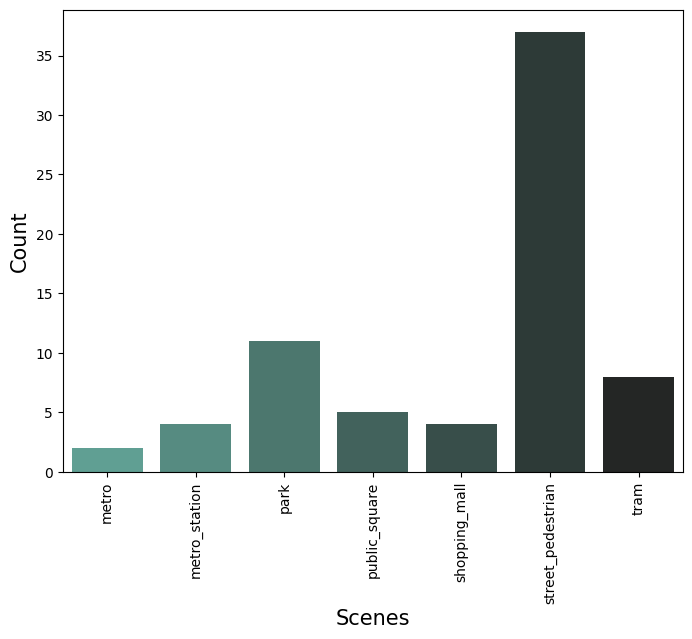

In [46]:
# Defining the plotsize
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.barplot(data=distribution, x = 'Actual Label', y = 'Filename', palette="dark:#5A9_r")
plt.xlabel("Scenes", size=15)
plt.ylabel("Count", size=15)
plt.xticks(rotation=90)
plt.show()

Highest focus on background information is for street and park, since there might not be that differential events.

#### Checking the audios with same set of events

In [62]:
audio_list = emptyset[emptyset['cam_pred_labels'] == 'metro'][['Filename','events_before','events_after']]

In [63]:
audio_list

Filename  \
165  /work/aistwal/dataset_tau2019/extracted-files/...   
861  /work/aistwal/dataset_tau2019/extracted-files/...   

                                         events_before  \
165  [Train, Vehicle, Rail transport, Railroad car,...   
861  [Train, Rail transport, Vehicle, Railroad car,...   

                                          events_after  
165  [Train, Vehicle, Rail transport, Railroad car,...  
861  [Train, Rail transport, Vehicle, Railroad car,...

In [69]:
audio_name = audio_list['Filename'].iloc[0]
audio_name

'/work/aistwal/dataset_tau2019/extracted-files/TAU-urban-acoustic-scenes-2019-development/audio/metro-lisbon-1199-44394-a.wav'

In [61]:
from IPython.display import Audio
import librosa

y, sr = librosa.load(audio_name, sr = 32000)
Audio(data=y, rate=sr)

In [67]:
audio_list.iloc[0]['events_before'], audio_list.iloc[1]['events_before']

(['Train',
  'Vehicle',
  'Rail transport',
  'Railroad car, train wagon',
  'Speech',
  'Field recording',
  'Outside, urban or manmade',
  'Subway, metro, underground',
  'Clickety-clack',
  'Outside, rural or natural'],
 ['Train',
  'Rail transport',
  'Vehicle',
  'Railroad car, train wagon',
  'Subway, metro, underground',
  'Clickety-clack',
  'Outside, urban or manmade',
  'Train wheels squealing',
  'Speech',
  'Field recording'])

In [68]:
audio_list.iloc[0]['events_after'], audio_list.iloc[1]['events_after']

(['Train',
  'Vehicle',
  'Rail transport',
  'Railroad car, train wagon',
  'Speech',
  'Subway, metro, underground',
  'Outside, urban or manmade',
  'Field recording',
  'Clickety-clack',
  'Outside, rural or natural'],
 ['Train',
  'Rail transport',
  'Vehicle',
  'Railroad car, train wagon',
  'Subway, metro, underground',
  'Clickety-clack',
  'Outside, urban or manmade',
  'Train wheels squealing',
  'Speech',
  'Field recording'])

### Bert

In [11]:
# #BERT
# import torch
# from transformers import BertTokenizer, BertModel
# import numpy as np

# # Load pre-trained BERT tokenizer and model
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')

# # Function to get BERT embeddings for a single event
# def get_bert_embedding(event, tokenizer, model):
#     inputs = tokenizer(event, return_tensors='pt')
#     with torch.no_grad():
#         outputs = model(**inputs)
#     # Take the mean of the token embeddings to get a single vector for the event
#     embedding = torch.mean(outputs.last_hidden_state, dim=1).squeeze()
#     return embedding.numpy()

In [12]:
# # Get embeddings for preprocessed events
# embeddings = {event: get_bert_embedding(event, tokenizer, model) for event in final_events_list}

In [13]:
# # Example: Checking the cosine similarity between two preprocessed event embeddings
# from sklearn.metrics.pairwise import cosine_similarity

# event1 = 'cricket'
# event2 = 'aircraft'

# embedding1 = embeddings[event1]
# embedding2 = embeddings[event2]

# similarity = cosine_similarity([embedding1], [embedding2])[0][0]

# print(f"Cosine similarity between '{event1}' and '{event2}': {similarity:.3f}")

### Word2Vec

In [31]:
'''
HAS PROBLEMS WITH PHRASES
'''

# using pretrained model
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/work/aistwal/MMDS_MasterThesis/models/asc/wordvectors/GoogleNews-vectors-negative300.bin', binary=True)

In [38]:
len(model['shufflingcards'])

KeyError: "Key 'shufflingcards' not present"

### FastTEXT

In [54]:
from gensim.models import KeyedVectors

fasttext_file = '/work/aistwal/MMDS_MasterThesis/models/asc/wordvectors/wiki-news-300d-1M-subword.vec'
fasttext_model = KeyedVectors.load_word2vec_format(fasttext_file)

In [55]:
import fasttext

# Load the FastText model using the fasttext library for OOV handling
# Download the bin file from https://fasttext.cc/docs/en/crawl-vectors.html if not already done
fasttext_bin_file = '/work/aistwal/MMDS_MasterThesis/models/asc/wordvectors/cc.en.300.bin'
fasttext_fallback_model = fasttext.load_model(fasttext_bin_file)

primary_embeddings = []
fallback_embeddings = []
def get_word_embedding(word, model, fallback_model):
    if word in model:
        primary_embeddings.append(model[word])
        # return model[word] #Commenting out as the embeddings are getting clustered separately
        return fallback_model.get_word_vector(word)
    else:
        # Use FastText subword information for OOV terms
        fallback_embeddings.append(fallback_model.get_word_vector(word))
        return fallback_model.get_word_vector(word)

embedding_list = []
for event in final_events_list:
    embedding = get_word_embedding(event, fasttext_model, fasttext_fallback_model)
    embedding_list.append(embedding)


In [56]:
type(fallback_embeddings[0]), len(fallback_embeddings[0]),len(primary_embeddings[0]), fallback_embeddings[0].shape

(numpy.ndarray, 300, 300, (300,))

In [57]:
final_events_list

['gunshot gunfire',
 'wind chime',
 'clickety clack',
 'trickle dribble',
 'tearing',
 'drum',
 'aircraft',
 'breathing',
 'boom',
 'turkey',
 'sliding door',
 'alarm clock',
 'spray',
 'pink noise',
 'eruption',
 'wind',
 'mechanical fan',
 'rail transport',
 'slam',
 'plop',
 'sawing',
 'vibration',
 'arrow',
 'environmental noise',
 'smash crash',
 'jingle bell',
 'bicycle',
 'traffic noise roadway noise',
 'bird vocalization bird call bird song',
 'tuning fork',
 'frog',
 'outside rural or natural',
 'inside small room',
 'raindrop',
 'rustling leaves',
 'toot',
 'conversation',
 'ship',
 'creak',
 'chink clink',
 'applause',
 'bleat',
 'single lens reflex camera',
 'clapping',
 'guitar',
 'child speech kid speaking',
 'cash register',
 'inside public space',
 'animal',
 'dog',
 'cat',
 'motorboat speedboat',
 'burst pop',
 'crying sobbing',
 'goat',
 'yip',
 'sewing machine',
 'shuffle',
 'idling',
 'crackle',
 'glass',
 'wood',
 'white noise',
 'gears',
 'noise',
 'canidae dogs w

In [58]:
final_events_list.index('gasp'), final_events_list.index('microwave oven') #Cosine similarity: -0.0048
final_events_list.index('rowboat canoe kayak'), final_events_list.index('car passing by') #Cosine similarity: 0.2
final_events_list.index('rowboat canoe kayak'), final_events_list.index('motorboat speedboat') #Cosine similarity: 0.61
final_events_list.index('whimper dog'), final_events_list.index('dog') #Cosine similarity: 0.071

(85, 49)

In [59]:
len(embedding_list), len(embedding_list[0])

(289, 300)

In [60]:
from scipy.spatial.distance import cosine

def cosine_similarity(embedding_1, embedding_2):
    # Calculate the cosine similarity of the two embeddings.
    sim = 1 - cosine(embedding_1, embedding_2)
    print('Cosine similarity: {:.2}'.format(sim))

cosine_similarity(embedding_list[127], embedding_list[165])

Cosine similarity: -0.015


In [61]:
# Create DataFrame
embedding_df = pd.DataFrame({
    "Events": final_events_list,
    "Embedding": embedding_list
})
embedding_df

Events                                          Embedding
0       gunshot gunfire  [-0.007969308, 0.012419426, 0.003312192, 0.098...
1            wind chime  [-0.007392925, 0.00560997, 0.01584867, 0.05757...
2        clickety clack  [0.008532416, 0.011136299, -0.019795245, 0.027...
3       trickle dribble  [0.0049925656, 0.0023322813, 0.006658404, 0.04...
4               tearing  [-0.011051106, -0.086254016, 0.05878997, 0.058...
..                  ...                                                ...
284              rattle  [-0.089178324, -0.01245896, 0.007996987, 0.084...
285                fowl  [0.1867238, -0.06166532, 0.07059225, 0.1044892...
286                 car  [0.13749835, 0.17365289, 0.015517365, 0.237601...
287  boat water vehicle  [-0.02420643, 0.026853975, 0.0174908, 0.023872...
288            scissors  [-0.008923632, -0.020646375, 0.026987549, 0.04...

[289 rows x 2 columns]

In [223]:
embedding_df['Embedding'].values[0].shape

(300,)

In [62]:
#perform tsne
import time
import numpy as np
from sklearn.decomposition import PCA

data_matrix = np.stack(embedding_df['Embedding'].values)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(data_matrix)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 289 samples in 0.000s...
[t-SNE] Computed neighbors for 289 samples in 0.258s...
[t-SNE] Computed conditional probabilities for sample 289 / 289
[t-SNE] Mean sigma: 0.139379
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.279846
[t-SNE] KL divergence after 300 iterations: 1.246668
t-SNE done! Time elapsed: 0.7500123977661133 seconds


In [63]:
embedding_df['tsne-2d-one'] = tsne_results[:,0]
embedding_df['tsne-2d-two'] = tsne_results[:,1]

In [64]:
# embedding_df.head()
# embedding_df.loc[embedding_df['Events'] == 'whispering', 'tsne-2d-one'].item()

In [65]:
type(embedding_df['Embedding'][0]), embedding_df['Embedding'].values[0].shape

(numpy.ndarray, (300,))

In [66]:
embedding_df.to_csv("event_embeddings.csv")

In [15]:
stored_embedding_df = pd.read_csv('event_embeddings.csv').drop("Unnamed: 0", axis = 1 )
stored_embedding_df['Embedding'] = stored_embedding_df['Embedding'].map(lambda x: x.replace("[ ","[").replace(" ]","]"))
# Split and join the string values
stored_embedding_df['Embedding'] = stored_embedding_df['Embedding'].apply(lambda x: ','.join(x.split()))
stored_embedding_df['Embedding'] = stored_embedding_df['Embedding'].apply(ast.literal_eval).apply(np.array)
# embedding_df['Embedding'].apply(ast.literal_eval)
stored_embedding_df.head()

Events                                          Embedding  \
0  gunshot gunfire  [-0.00796931, 0.01241943, 0.00331219, 0.098236...   
1       wind chime  [-0.00739292521, 0.00560997007, 0.0158486702, ...   
2   clickety clack  [0.00853242, 0.0111363, -0.01979524, 0.0275478...   
3  trickle dribble  [0.00499257, 0.00233228, 0.0066584, 0.04817014...   
4          tearing  [-0.0110511063, -0.0862540156, 0.0587899685, 0...   

   tsne-2d-one  tsne-2d-two  
0   -11.026864     7.871727  
1     0.685318     5.623521  
2     6.109850     2.608238  
3     5.419329     1.493873  
4     8.988227    -2.683697

In [16]:
type(stored_embedding_df['Embedding'][0]), stored_embedding_df['Embedding'].values[0].shape

(numpy.ndarray, (300,))

In [17]:
embedding_df[embedding_df['Events'] == 'clip clop']

NameError: name 'embedding_df' is not defined

In [18]:
stored_embedding_df[stored_embedding_df['Events'] == 'clip clop']

Events                                          Embedding  \
210  clip clop  [-0.0270164907, -0.0507147834, -0.00280965609,...   

     tsne-2d-one  tsne-2d-two  
210     6.550182    -6.393346

In [19]:
embedding_df = stored_embedding_df

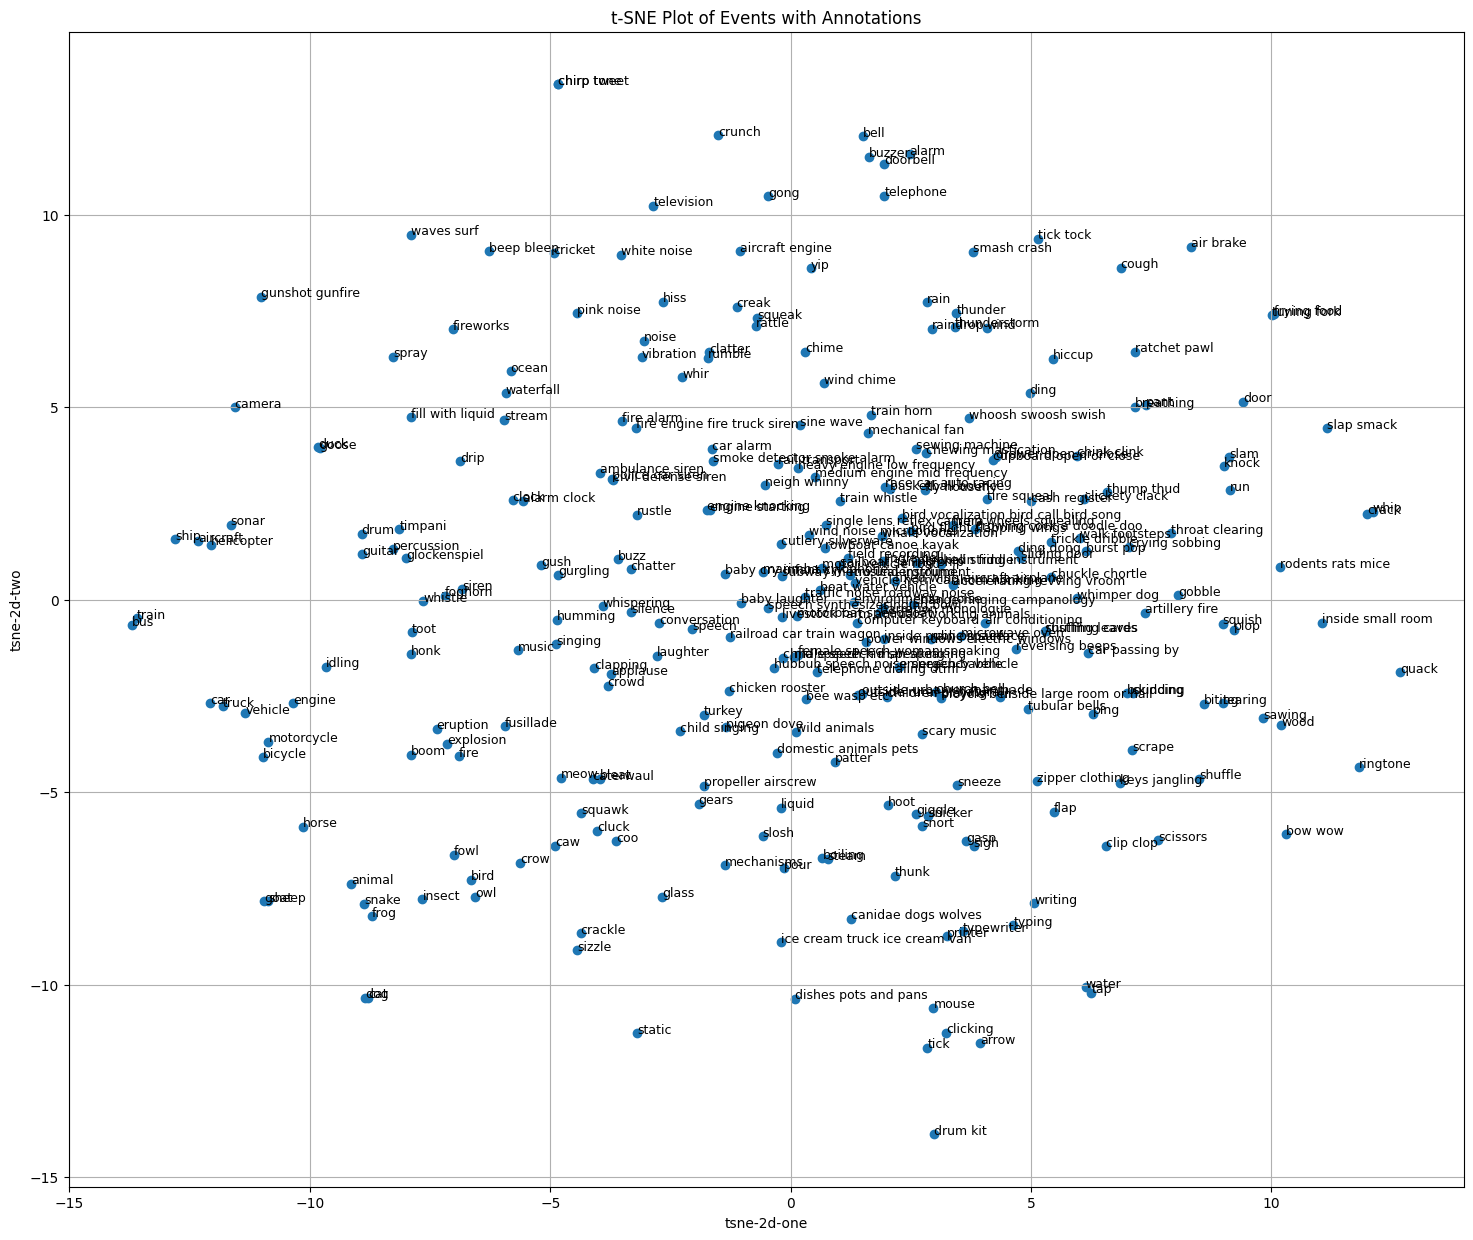

In [20]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(18, 15))
plt.scatter(embedding_df['tsne-2d-one'], embedding_df['tsne-2d-two'], marker='o')

# Annotating each point with the event name
for i, event in embedding_df.iterrows():
    plt.annotate(event['Events'], (event['tsne-2d-one'], event['tsne-2d-two']), fontsize=9)

plt.title('t-SNE Plot of Events with Annotations')
plt.xlabel('tsne-2d-one')
plt.ylabel('tsne-2d-two')
plt.grid(True)

## AIRPORT-EVENT

In [21]:
# Now groupwise representing important events for the scene
airport_df = events_df.groupby("Predicted Label").get_group("airport")
print(airport_df.shape)
airport_df.head()

(280, 7)


Filename Predicted Label  \
4   /work/aistwal/dataset_tau2019/extracted-files/...         airport   
7   /work/aistwal/dataset_tau2019/extracted-files/...         airport   
9   /work/aistwal/dataset_tau2019/extracted-files/...         airport   
18  /work/aistwal/dataset_tau2019/extracted-files/...         airport   
19  /work/aistwal/dataset_tau2019/extracted-files/...         airport   

   Actual Label                                      events_before  \
4       airport  [Speech, Clip-clop, Horse, Animal, Run, Vehicl...   
7       airport  [Speech, Clip-clop, Horse, Animal, Vehicle, Ru...   
9       airport  [Speech, Animal, Clip-clop, Horse, Vehicle, In...   
18      airport  [Speech, Animal, Clip-clop, Arrow, Horse, Vehi...   
19      airport  [Speech, Male speech, man speaking, Narration,...   

                                         events_after cam_pred_labels  \
4   [Speech, Clip-clop, Horse, Animal, Gears, Mech...         airport   
7   [Silence, Vehicle, Music, Speech, Car, Outside...   metro_station   
9   [Speech, Animal, Outside, urban or manmade, Ve...   metro_station   
18  [Speech, Vehicle, Outside, urban or manmade, M...   metro_station   
19  [Speech, Animal, Vehicle, Music, Male speech, ...         airport   

                                           not_common  
4                       {'Outside, urban or manmade'}  
7   {'Walk, footsteps', 'Run', 'Horse', 'Clip-clop...  
9   {'Clip-clop', 'Mouse', 'Male speech, man speak...  
18  {'Whip', 'Run', 'Horse', 'Clip-clop', 'Arrow',...  
19  {'Female speech, woman speaking', 'Narration, ...

In [22]:
# Get all unique events in column events_after and plot them using their tsne coordinates. 
# Increase the marker shape based on count of the events

airport_df = airport_df.reset_index(drop=True)
# Flatten the list of lists to a single list of events
airport_events = [event for sublist in airport_df['events_after'] for event in sublist]
print("Total number of events: ", len(airport_events))

# Get unique events
unique_events_after = set(airport_events)
print("Total number of unique events_after: ", len(unique_events_after))

Total number of events:  2800
Total number of unique events_after:  107


In [23]:
final_events_list = list(airport_events)
import re
def preprocess_event(event):
    # Convert to lowercase
    event = event.lower()
    
    # Replace special characters with space
    event = re.sub(r'[^\w\s]', ' ', event)
    
    # Tokenize and join back
    event = ' '.join(event.split())
    
    return event

# Preprocess events
final_events_list = [preprocess_event(event) for event in final_events_list]
len(final_events_list)

2800

In [24]:
# final_events_list = list(airport_events)
# # Replace specific characters (if required, this step can be customized)
# final_events_list = [event.replace(r", ","-") for event in final_events_list]
# final_events_list = [event.replace(r" ","-") for event in final_events_list]
# print("Final events: ", final_events_list[:4])

In [25]:
# Count all the occurences of the events
from collections import Counter
eventcount = Counter(final_events_list)
eventcount['speech']

278

In [26]:
counts = []
tsne_1 = []
tsne_2 = []
for airport_events, count in eventcount.items():
    counts.append(count)
    tsne_1.append(embedding_df.loc[embedding_df['Events'] == airport_events, 'tsne-2d-one'].item())
    tsne_2.append(embedding_df.loc[embedding_df['Events'] == airport_events, 'tsne-2d-two'].item())

airport_events_df = pd.DataFrame({
    "Events":list(eventcount.keys()),
    "Counts":counts,
    "Tsne_1":tsne_1,
    "Tsne_2":tsne_2
})

In [27]:
airport_events_df[airport_events_df['Events'] == 'speech']

Events  Counts    Tsne_1   Tsne_2
0  speech     278 -2.054262 -0.77112

In [28]:
sorted_df = airport_events_df.sort_values(by = ['Counts'], ascending=False)
sorted_df

Events  Counts     Tsne_1    Tsne_2
0                      speech     278  -2.054262 -0.771120
3                      animal     273  -9.137732 -7.371664
6                     vehicle     262 -11.342047 -2.943358
13   outside urban or manmade     237   1.488994 -2.440342
11                      music     195  -5.677467 -1.315370
..                        ...     ...        ...       ...
51                        coo       1  -3.634526 -6.274742
66            rustling leaves       1   5.310390 -0.814965
63                    writing       1   5.063309 -7.884787
62           fill with liquid       1  -7.905284  4.742349
106                  scissors       1   7.641714 -6.246041

[107 rows x 4 columns]

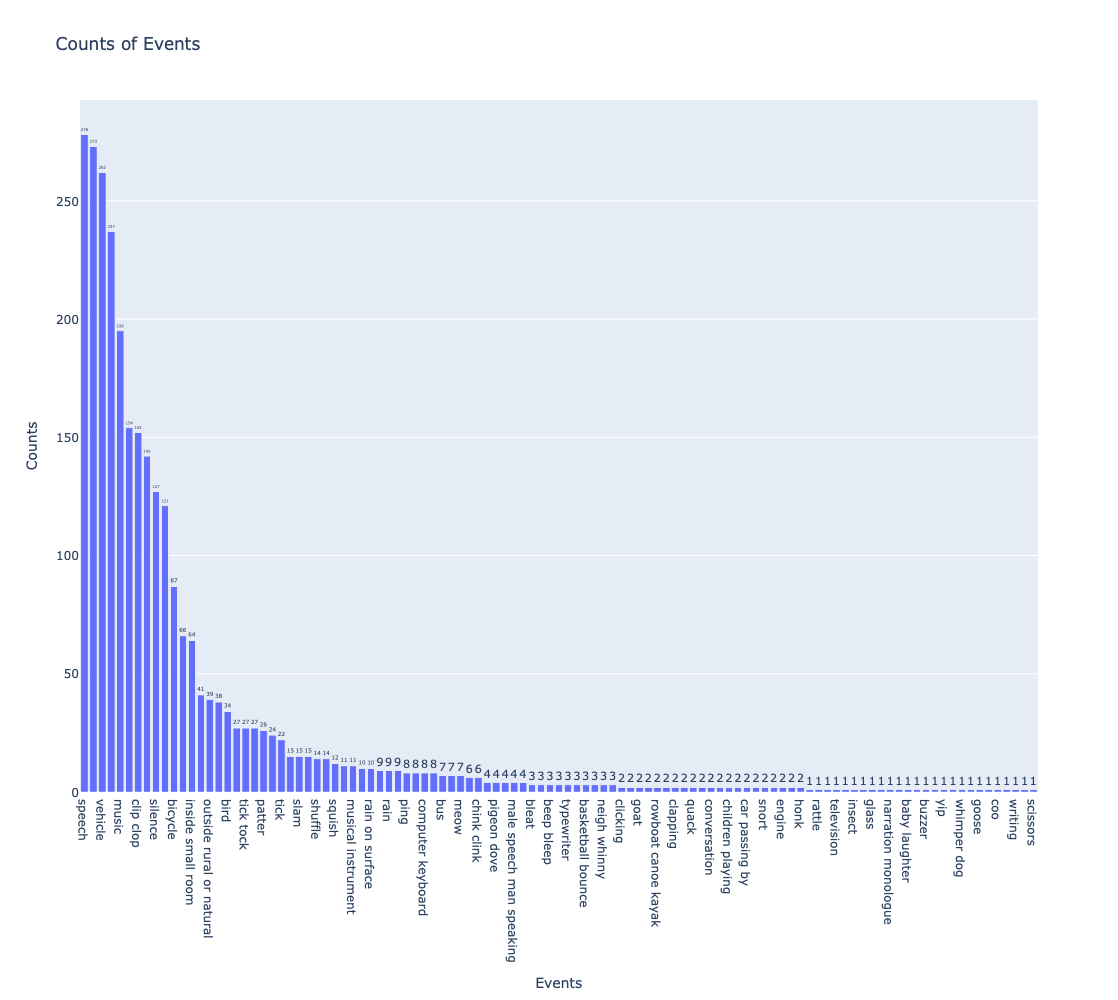

In [29]:
import plotly.express as px
# Create a bar plot using Plotly
fig = px.bar(
    sorted_df,
    x='Events',
    y='Counts',
    title='Counts of Events',
    text='Counts'
)

# Update the layout to make the text annotations more readable
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(
    xaxis_title='Events',
    yaxis_title='Counts',
    height = 1000,
    width = 1000,
    showlegend=False  # Hide the legend
)

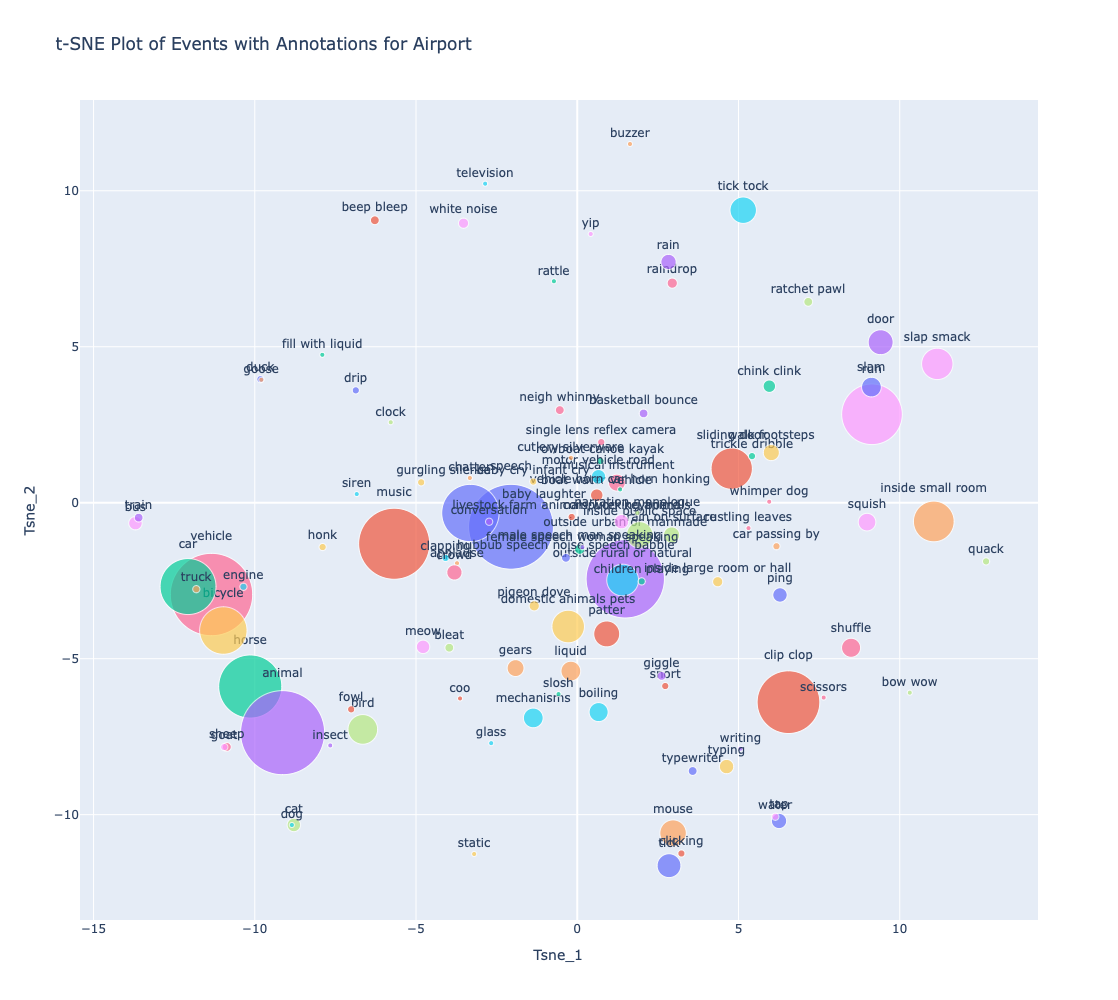

In [30]:
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter(
    airport_events_df,
    x='Tsne_1',
    y='Tsne_2',
    size='Counts',
    color='Events',
    hover_name='Events',
    text='Events',
    title='Scatter Plot of Events with t-SNE Coordinates',
    size_max=60  # Control the maximum size of the bubbles
)

# Update the layout to make the text annotations more readable
fig.update_traces(textposition='top center')

fig.update_layout(
    title='t-SNE Plot of Events with Annotations for Airport',
    xaxis_title='Tsne_1',
    yaxis_title='Tsne_2',
    showlegend=False,  # Hide the legend if it overlaps with the bubbles
    height = 1000,
    width = 1000,
)

# Show the plot
fig.show()

In [31]:
# We can see there is a huge variation in the occurences of events. Hence we can try and visualize with only a subset of events.
# dropping events less than 10

subset_airport_events_df = airport_events_df[airport_events_df['Counts'] >=8].reset_index(drop=True)
subset_airport_events_df.head()

Events  Counts     Tsne_1    Tsne_2
0     speech     278  -2.054262 -0.771120
1  clip clop     152   6.550182 -6.393346
2      horse     154 -10.139896 -5.891963
3     animal     273  -9.137732 -7.371664
4      gears      11  -1.912629 -5.301837

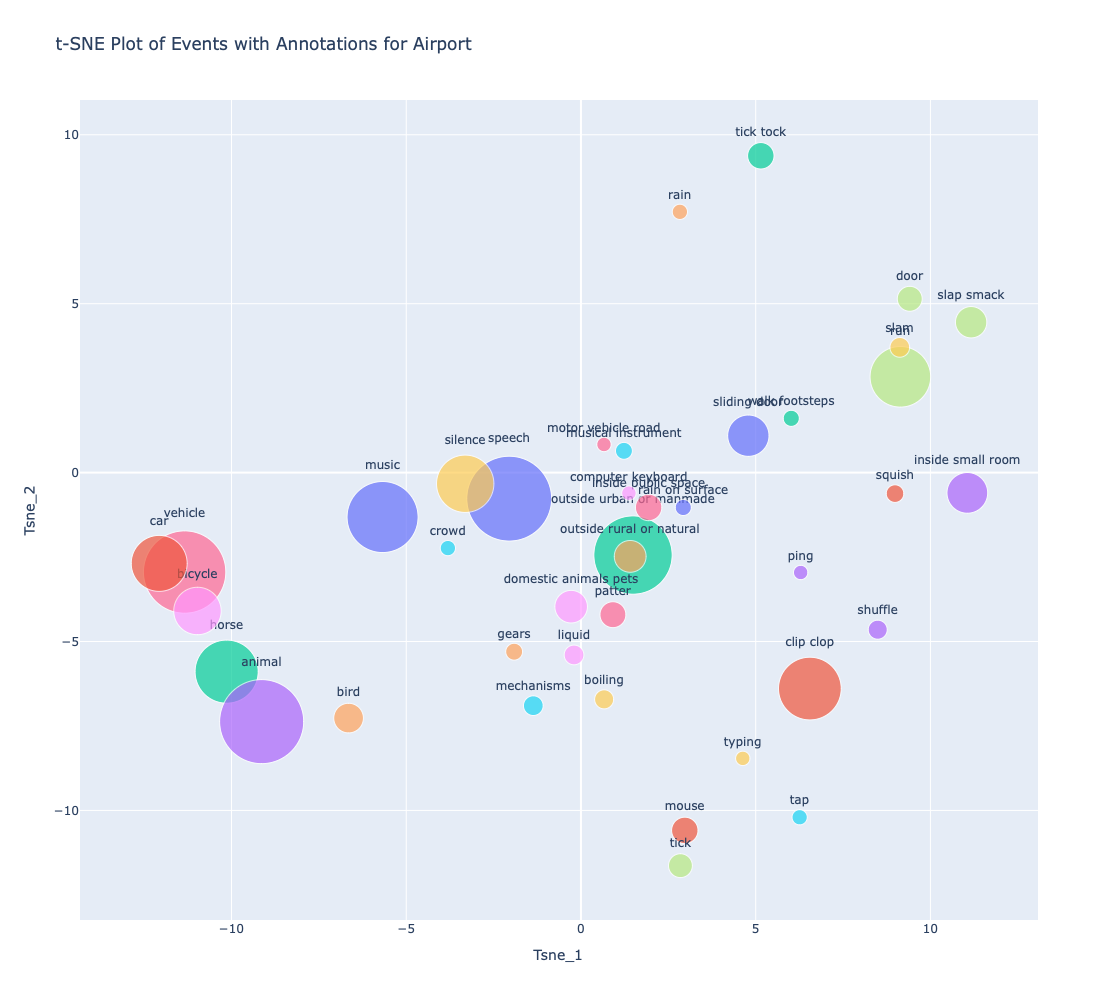

In [32]:
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter(
    subset_airport_events_df,
    x='Tsne_1',
    y='Tsne_2',
    size='Counts',
    color='Events',
    hover_name='Events',
    text='Events',
    title='Scatter Plot of Events with t-SNE Coordinates',
    size_max=60  # Control the maximum size of the bubbles
)

# Update the layout to make the text annotations more readable
fig.update_traces(textposition='top center')

fig.update_layout(
    title='t-SNE Plot of Events with Annotations for Airport',
    xaxis_title='Tsne_1',
    yaxis_title='Tsne_2',
    showlegend=False,  # Hide the legend if it overlaps with the bubbles
    height = 1000,
    width = 1000,
)

# Show the plot
fig.show()

## Street Pedestrian

In [33]:
# Now groupwise representing important events for the scene street_pedestrian
street_pedestrian_df = events_df.groupby("Predicted Label").get_group("street_pedestrian")
print(street_pedestrian_df.shape)
street_pedestrian_df.head()

(305, 7)


Filename    Predicted Label  \
0   /work/aistwal/dataset_tau2019/extracted-files/...  street_pedestrian   
2   /work/aistwal/dataset_tau2019/extracted-files/...  street_pedestrian   
8   /work/aistwal/dataset_tau2019/extracted-files/...  street_pedestrian   
13  /work/aistwal/dataset_tau2019/extracted-files/...  street_pedestrian   
21  /work/aistwal/dataset_tau2019/extracted-files/...  street_pedestrian   

         Actual Label                                      events_before  \
0   street_pedestrian  [Speech, Clip-clop, Animal, Run, Horse, Outsid...   
2   street_pedestrian  [Speech, Music, Vehicle, Chatter, Outside, urb...   
8   street_pedestrian  [Speech, Outside, urban or manmade, Hubbub, sp...   
13  street_pedestrian  [Speech, Clip-clop, Animal, Horse, Outside, ur...   
21  street_pedestrian  [Speech, Animal, Clip-clop, Horse, Vehicle, Si...   

                                         events_after    cam_pred_labels  \
0   [Speech, Clip-clop, Animal, Run, Horse, Outsid...  street_pedestrian   
2   [Speech, Music, Vehicle, Outside, urban or man...  street_pedestrian   
8   [Speech, Outside, urban or manmade, Vehicle, M...  street_pedestrian   
13  [Speech, Animal, Outside, urban or manmade, Cl...  street_pedestrian   
21  [Speech, Animal, Silence, Vehicle, Mouse, Hors...  street_pedestrian   

                                           not_common  
0                                               set()  
2   {'Inside, large room or hall', 'Chatter', 'Hub...  
8   {'Basketball bounce', 'Chatter', 'Hubbub, spee...  
13                                {'Walk, footsteps'}  
21               {'Outside, rural or natural', 'Run'}

In [34]:
# Get all unique events in column events_after and plot them using their tsne coordinates. 
# Increase the marker shape based on count of the events
street_pedestrian_df = street_pedestrian_df.reset_index(drop=True)

# Flatten the list of lists to a single list of events
street_pedestrian_events = [event for sublist in street_pedestrian_df['events_after'] for event in sublist]
print("Total number of events: ", len(street_pedestrian_events))

# Get unique events
unique_events_after = set(street_pedestrian_events)
print("Total number of unique events_after: ", len(unique_events_after))

final_events_list = list(street_pedestrian_events)

# Preprocess events
final_events_list = [preprocess_event(event) for event in final_events_list]
len(final_events_list)

Total number of events:  3050
Total number of unique events_after:  98


3050

In [35]:
# Count all the occurences of the events
from collections import Counter
eventcount = Counter(final_events_list)
eventcount['speech']

304

In [36]:
counts = []
tsne_1 = []
tsne_2 = []
for events, count in eventcount.items():
    counts.append(count)
    tsne_1.append(embedding_df.loc[embedding_df['Events'] == events, 'tsne-2d-one'].item())
    tsne_2.append(embedding_df.loc[embedding_df['Events'] == events, 'tsne-2d-two'].item())

street_pedestrian_events_df = pd.DataFrame({
    "Events":list(eventcount.keys()),
    "Counts":counts,
    "Tsne_1":tsne_1,
    "Tsne_2":tsne_2
})

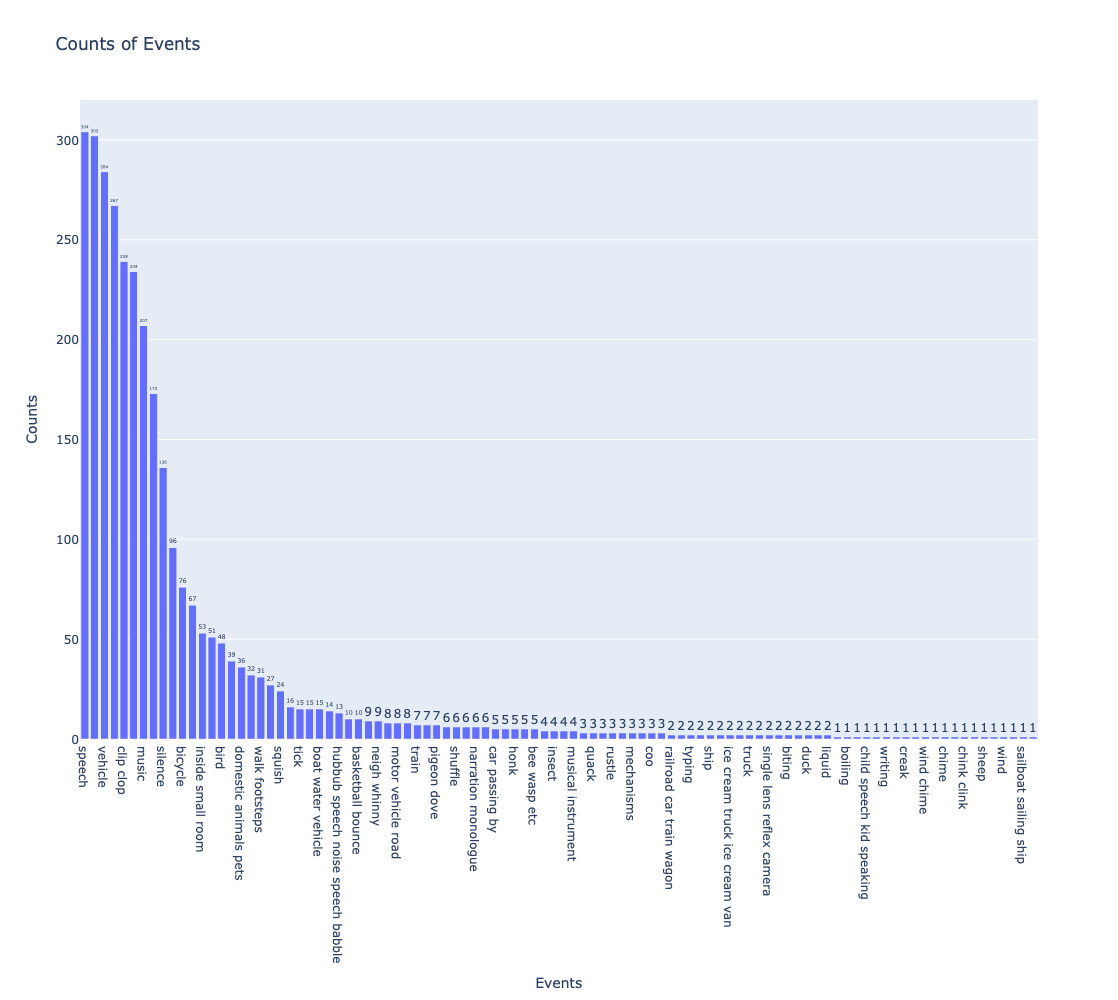

In [37]:
sorted_df = street_pedestrian_events_df.sort_values(by = ['Counts'], ascending=False)


#Plot
import plotly.express as px
# Create a bar plot using Plotly
fig = px.bar(
    sorted_df,
    x='Events',
    y='Counts',
    title='Counts of Events',
    text='Counts'
)

# Update the layout to make the text annotations more readable
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(
    xaxis_title='Events',
    yaxis_title='Counts',
    height = 1000,
    width = 1000,
    showlegend=False  # Hide the legend
)

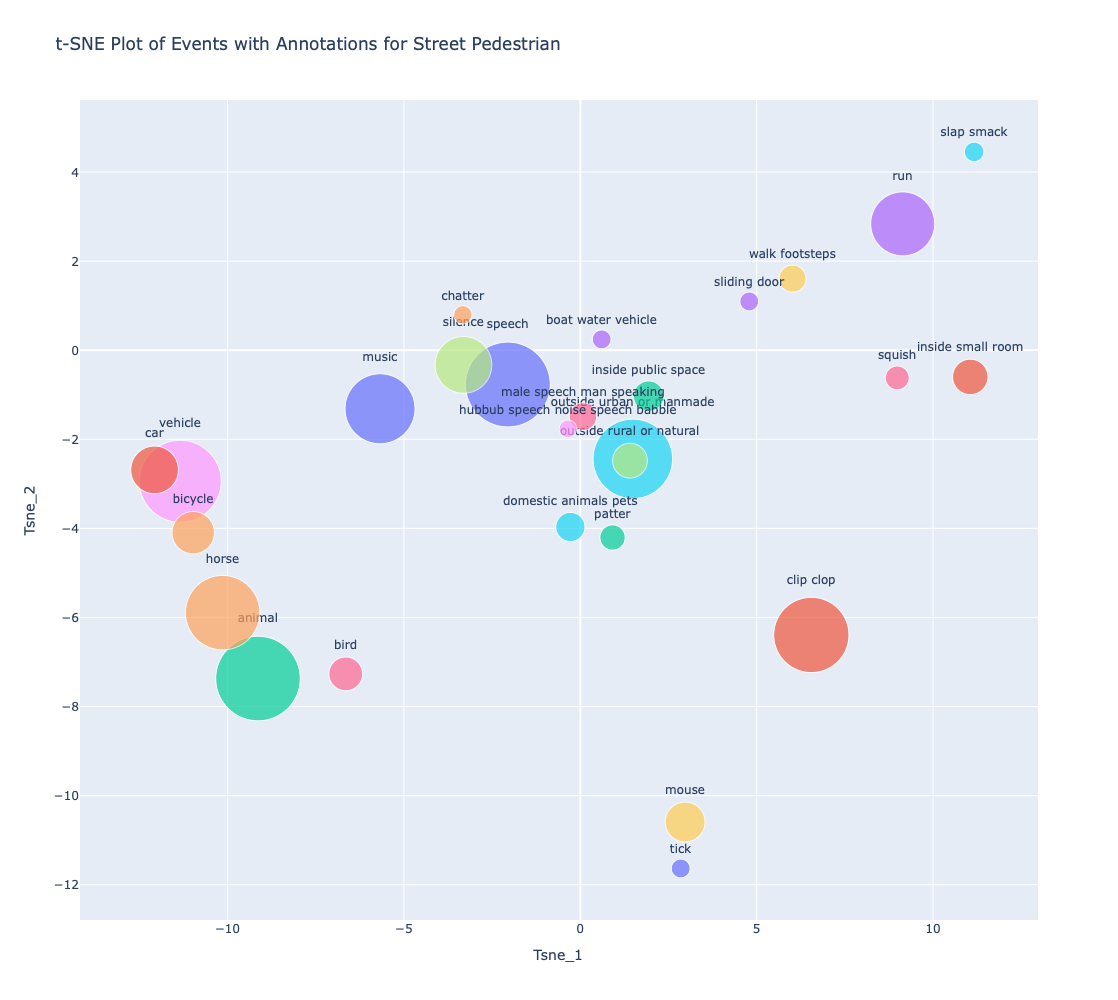

In [38]:
# Out of 305 audios in the street_pedestrian group there are many events below the occurence of 9 which we can remove and see
subset_street_pedestrian_events_df= street_pedestrian_events_df[street_pedestrian_events_df['Counts'] >=12].reset_index(drop=True)


# Plot
# dropping events less than 10
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter(
    subset_street_pedestrian_events_df,
    x='Tsne_1',
    y='Tsne_2',
    size='Counts',
    color='Events',
    hover_name='Events',
    text='Events',
    title='Scatter Plot of Events with t-SNE Coordinates',
    size_max=60  # Control the maximum size of the bubbles
)

# Update the layout to make the text annotations more readable
fig.update_traces(textposition='top center')

fig.update_layout(
    title='t-SNE Plot of Events with Annotations for Street Pedestrian',
    xaxis_title='Tsne_1',
    yaxis_title='Tsne_2',
    showlegend=False,  # Hide the legend if it overlaps with the bubbles
    height = 1000,
    width = 1000,
)

# Show the plot
fig.show()


airport scene has a more concentrated human activity cluster, possibly due to the confined spaces and higher density of people.

inside large room sounds are not there unlike airport

"speech," "vehicle," and "walk footsteps" are central in both scenes, highlighting the nature of human-dominated environments.


## Tram 

In [54]:
# Now groupwise representing important events for the scene street_pedestrian
tram_df = events_df.groupby("Predicted Label").get_group("tram")
print(tram_df.shape)
tram_df.head()

(298, 7)


Filename Predicted Label  \
14  /work/aistwal/dataset_tau2019/extracted-files/...            tram   
22  /work/aistwal/dataset_tau2019/extracted-files/...            tram   
28  /work/aistwal/dataset_tau2019/extracted-files/...            tram   
48  /work/aistwal/dataset_tau2019/extracted-files/...            tram   
60  /work/aistwal/dataset_tau2019/extracted-files/...            tram   

   Actual Label                                      events_before  \
14         tram  [Vehicle, Train, Railroad car, train wagon, Ra...   
22         tram  [Speech, Vehicle, Car, Bus, Train, Music, Outs...   
28         tram  [Vehicle, Field recording, Train, Ship, Car, W...   
48         tram  [Vehicle, Train, Mechanisms, Rail transport, R...   
60         tram  [Speech, Train, Vehicle, Rail transport, Railr...   

                                         events_after    cam_pred_labels  \
14  [Vehicle, Car, Silence, Train, Music, Outside,...               tram   
22  [Speech, Vehicle, Car, Bus, Music, Train, Outs...               tram   
28  [Silence, Vehicle, Music, Speech, Inside, smal...  street_pedestrian   
48  [Vehicle, Mechanisms, Sliding door, Gears, Rat...               tram   
60  [Speech, Vehicle, Train, Rail transport, Railr...              metro   

                                           not_common  
14            {'Field recording', 'Ship', 'Aircraft'}  
22                                       {'Aircraft'}  
28  {'Ship', 'Railroad car, train wagon', 'Boat, W...  
48             {'Railroad car, train wagon', 'Creak'}  
60      {'Aircraft', 'Fixed-wing aircraft, airplane'}

In [55]:
# Get all unique events in column events_after and plot them using their tsne coordinates. 
# Increase the marker shape based on count of the events
tram_df = tram_df.reset_index(drop=True)

# Flatten the list of lists to a single list of events
tram_events = [event for sublist in tram_df['events_after'] for event in sublist]
print("Total number of events: ", len(tram_events))

# Get unique events
unique_events_after = set(tram_events)
print("Total number of unique events_after: ", len(unique_events_after))

final_events_list = list(tram_events)

# Preprocess events
final_events_list = [preprocess_event(event) for event in final_events_list]
len(final_events_list)

Total number of events:  2980
Total number of unique events_after:  137


2980

In [56]:
# Count all the occurences of the events
from collections import Counter
eventcount = Counter(final_events_list)
print("speech :", eventcount['speech'])




counts = []
tsne_1 = []
tsne_2 = []
for events, count in eventcount.items():
    counts.append(count)
    tsne_1.append(embedding_df.loc[embedding_df['Events'] == events, 'tsne-2d-one'].item())
    tsne_2.append(embedding_df.loc[embedding_df['Events'] == events, 'tsne-2d-two'].item())

tram_events_df = pd.DataFrame({
    "Events":list(eventcount.keys()),
    "Counts":counts,
    "Tsne_1":tsne_1,
    "Tsne_2":tsne_2
})

sorted_df = tram_events_df.sort_values(by = ['Counts'], ascending=False)

speech : 282


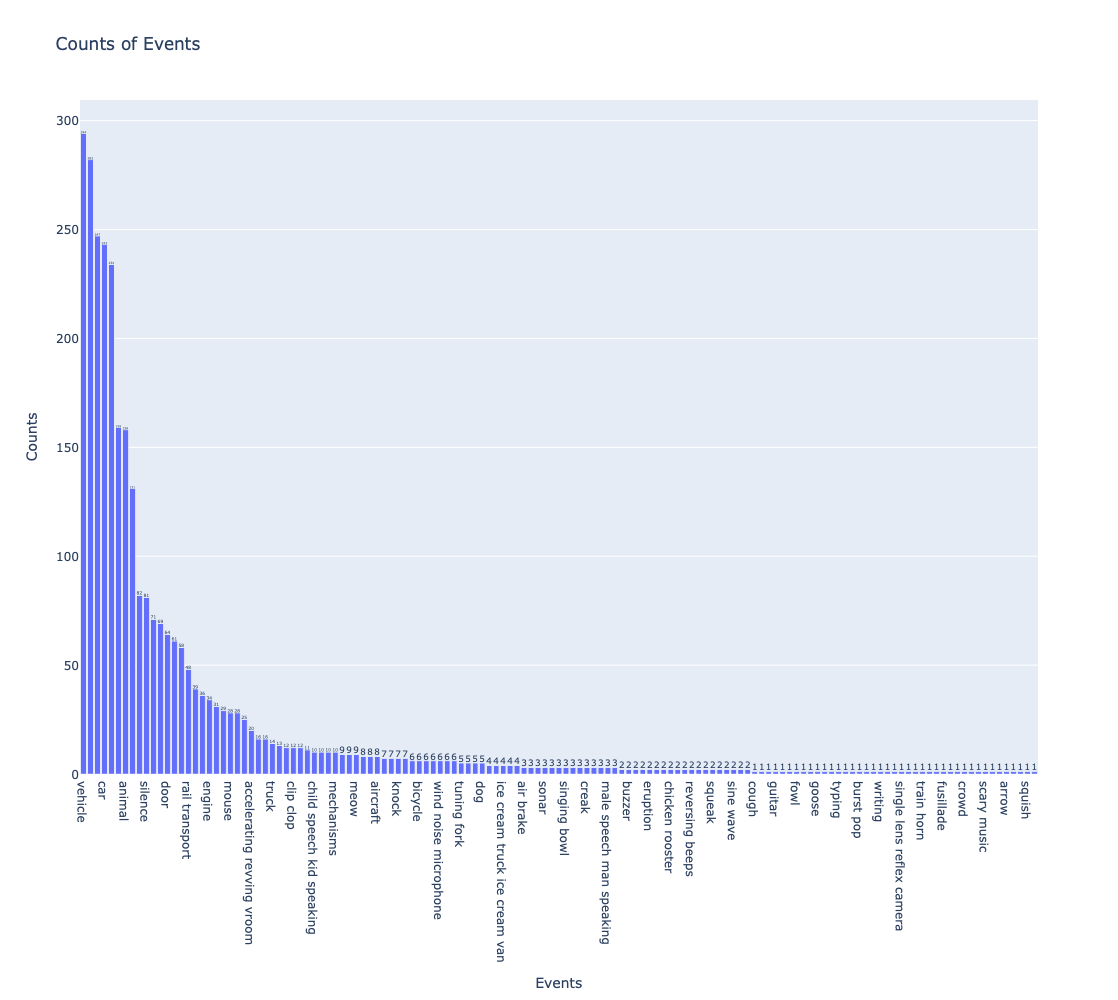

In [57]:
#Plot
import plotly.express as px
# Create a bar plot using Plotly
fig = px.bar(
    sorted_df,
    x='Events',
    y='Counts',
    title='Counts of Events',
    text='Counts'
)

# Update the layout to make the text annotations more readable
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(
    xaxis_title='Events',
    yaxis_title='Counts',
    height = 1000,
    width = 1000,
    showlegend=False  # Hide the legend
)

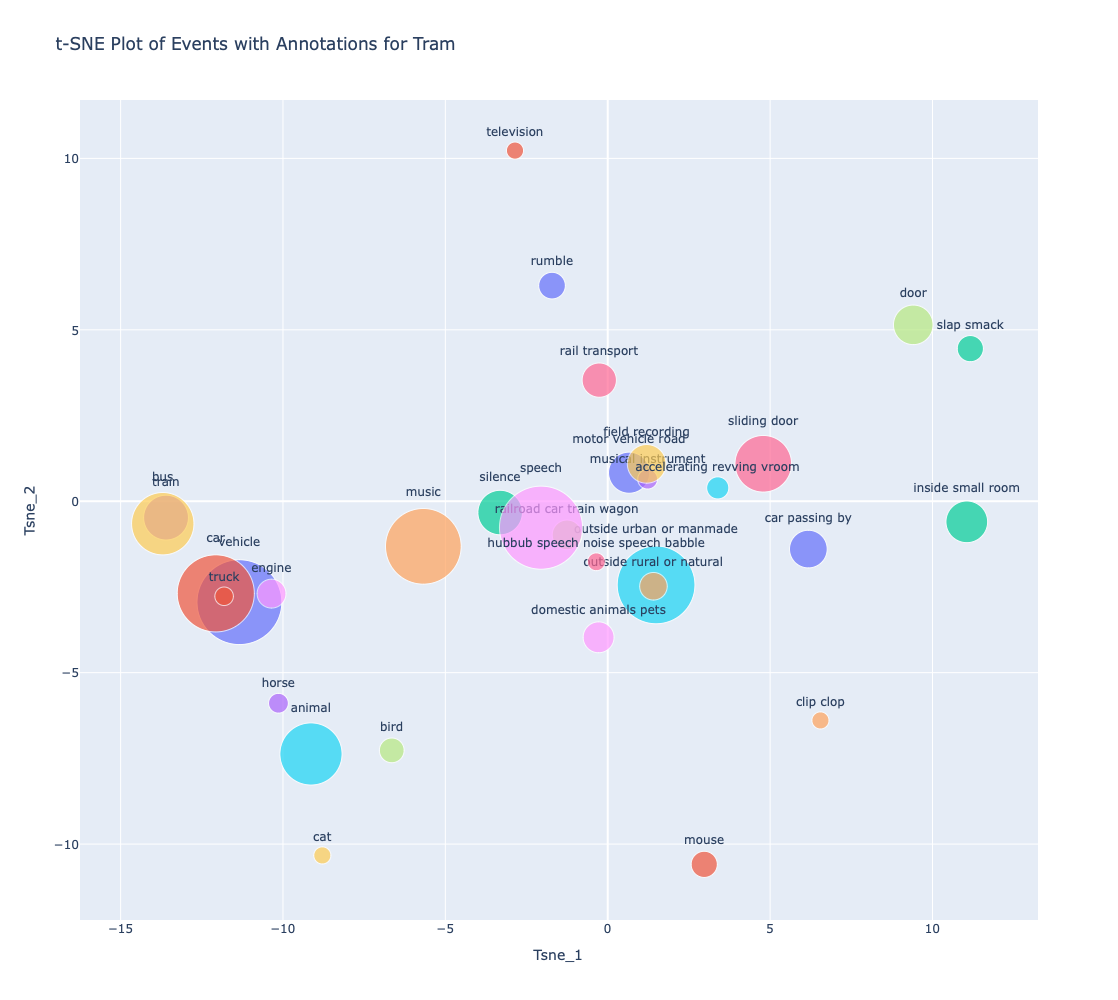

In [58]:
subset_tram_df = tram_events_df[tram_events_df['Counts'] >=12].reset_index(drop=True)


# Plot
# dropping events less than 10
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter(
    subset_tram_df,
    x='Tsne_1',
    y='Tsne_2',
    size='Counts',
    color='Events',
    hover_name='Events',
    text='Events',
    title='Scatter Plot of Events with t-SNE Coordinates',
    size_max=60  # Control the maximum size of the bubbles
)

# Update the layout to make the text annotations more readable
fig.update_traces(textposition='top center')

fig.update_layout(
    title='t-SNE Plot of Events with Annotations for Tram',
    xaxis_title='Tsne_1',
    yaxis_title='Tsne_2',
    showlegend=False,  # Hide the legend if it overlaps with the bubbles
    height = 1000,
    width = 1000,
)

# Show the plot
fig.show()

Model tends to focus on active events like rumble, door, tram, railroad, wagon, bus, or some cluster of vehicle related sounds, which is different
from those of airport and street pedestrian. The model also focuses on indoor events.

In [59]:
# array(['airport', 'bus', 'metro', 'metro_station', 'park',
#        'public_square', 'shopping_mall', 'street_pedestrian',
#        'street_traffic', 'tram'], dtype=object)

## Metro Station

152 records of metro station

In [44]:
# Now groupwise representing important events for the scene street_pedestrian
metro_station_df = events_df.groupby("Predicted Label").get_group("metro_station")
print(metro_station_df.shape)
metro_station_df.head()

(152, 7)


Filename Predicted Label  \
5    /work/aistwal/dataset_tau2019/extracted-files/...   metro_station   
10   /work/aistwal/dataset_tau2019/extracted-files/...   metro_station   
16   /work/aistwal/dataset_tau2019/extracted-files/...   metro_station   
72   /work/aistwal/dataset_tau2019/extracted-files/...   metro_station   
119  /work/aistwal/dataset_tau2019/extracted-files/...   metro_station   

      Actual Label                                      events_before  \
5    metro_station  [Train, Vehicle, Railroad car, train wagon, Ra...   
10   metro_station  [Speech, Vehicle, Train, Rail transport, Mouse...   
16   metro_station  [Speech, Vehicle, Train, Rail transport, Railr...   
72   metro_station  [Vehicle, Train, Railroad car, train wagon, Ra...   
119  metro_station  [Train, Railroad car, train wagon, Rail transp...   

                                          events_after cam_pred_labels  \
5    [Vehicle, Train, Rail transport, Railroad car,...   metro_station   
10   [Speech, Vehicle, Train, Rail transport, Mouse...   metro_station   
16   [Vehicle, Speech, Car, Bus, Outside, urban or ...   metro_station   
72   [Vehicle, Car, Bus, Explosion, Outside, urban ...           metro   
119  [Vehicle, Car, Silence, Outside, urban or manm...   metro_station   

                                            not_common  
5    {'Air brake', 'Train wheels squealing', 'Subwa...  
10                                               set()  
16   {'Snort', 'Rail transport', 'Railroad car, tra...  
72   {'Rail transport', 'Railroad car, train wagon'...  
119  {'Railroad car, train wagon', 'Train wheels sq...

In [47]:
# Get all unique events in column events_after and plot them using their tsne coordinates. 
# Increase the marker shape based on count of the events
metro_station_df = metro_station_df.reset_index(drop=True)

# Flatten the list of lists to a single list of events
metro_station_events = [event for sublist in metro_station_df['events_after'] for event in sublist]
print("Total number of events: ", len(metro_station_events))

# Get unique events
unique_events_after = set(metro_station_events)
print("Total number of unique events_after: ", len(unique_events_after))

final_events_list = list(metro_station_events)

# Preprocess events
final_events_list = [preprocess_event(event) for event in final_events_list]
len(final_events_list)

Total number of events:  1520
Total number of unique events_after:  86


1520

In [48]:
# Count all the occurences of the events
from collections import Counter
eventcount = Counter(final_events_list)
print("speech :", eventcount['speech'])




counts = []
tsne_1 = []
tsne_2 = []
for events, count in eventcount.items():
    counts.append(count)
    tsne_1.append(embedding_df.loc[embedding_df['Events'] == events, 'tsne-2d-one'].item())
    tsne_2.append(embedding_df.loc[embedding_df['Events'] == events, 'tsne-2d-two'].item())

metro_station_events_df = pd.DataFrame({
    "Events":list(eventcount.keys()),
    "Counts":counts,
    "Tsne_1":tsne_1,
    "Tsne_2":tsne_2
})

sorted_df = metro_station_events_df.sort_values(by = ['Counts'], ascending=False)

speech : 139


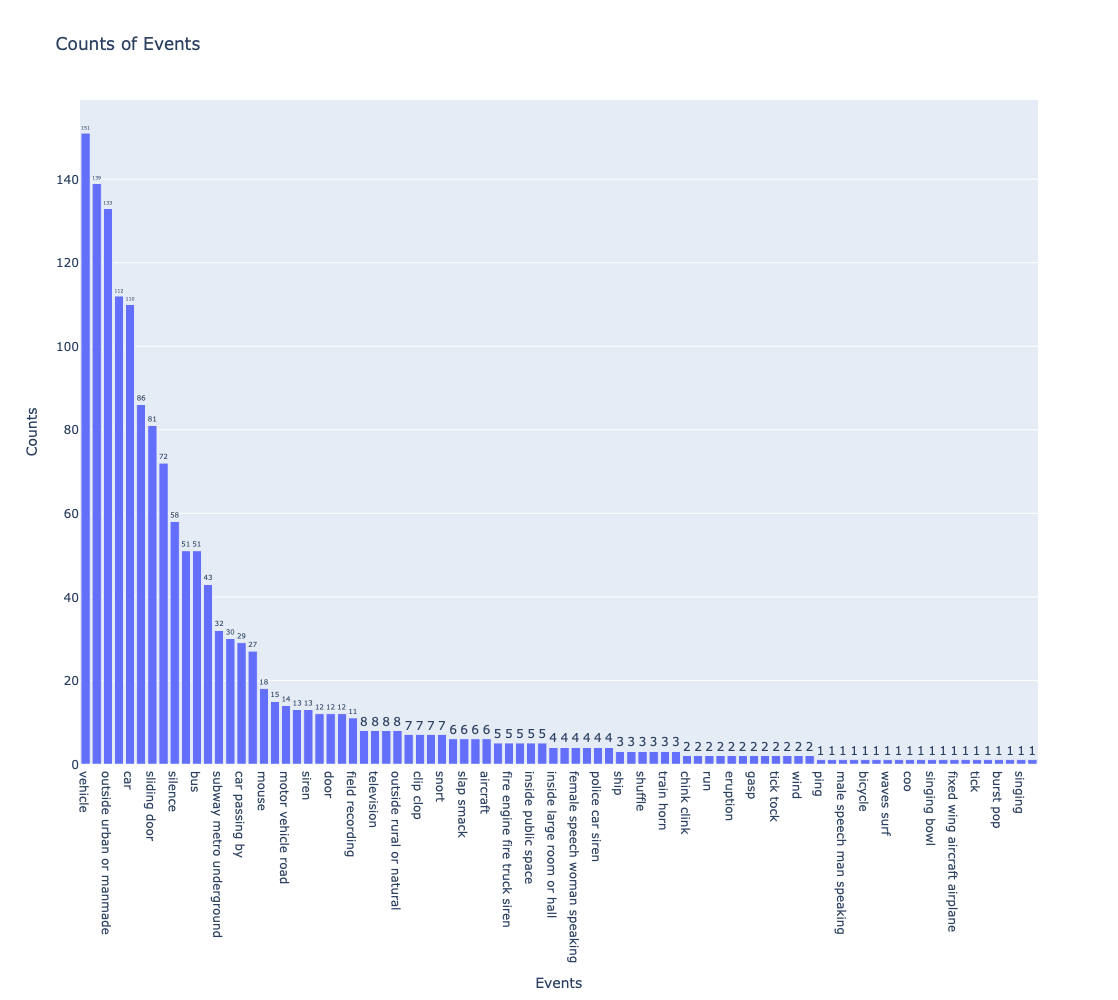

In [49]:
#Plot
import plotly.express as px
# Create a bar plot using Plotly
fig = px.bar(
    sorted_df,
    x='Events',
    y='Counts',
    title='Counts of Events',
    text='Counts'
)

# Update the layout to make the text annotations more readable
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(
    xaxis_title='Events',
    yaxis_title='Counts',
    height = 1000,
    width = 1000,
    showlegend=False  # Hide the legend
)

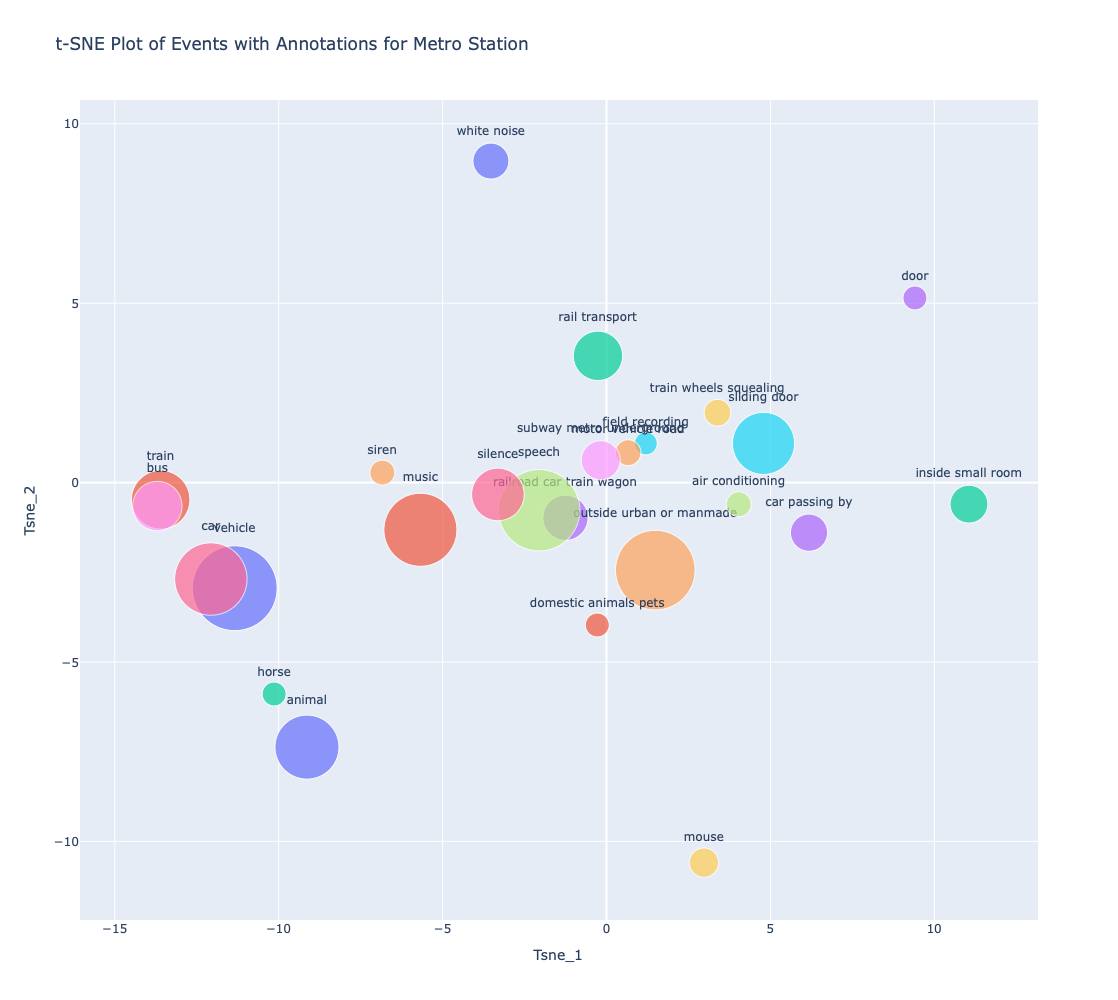

In [52]:
subset_metro_station_df = metro_station_events_df[metro_station_events_df['Counts'] >=11].reset_index(drop=True)


# Plot
# dropping events less than 10
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter(
    subset_metro_station_df,
    x='Tsne_1',
    y='Tsne_2',
    size='Counts',
    color='Events',
    hover_name='Events',
    text='Events',
    title='Scatter Plot of Events with t-SNE Coordinates',
    size_max=60  # Control the maximum size of the bubbles
)

# Update the layout to make the text annotations more readable
fig.update_traces(textposition='top center')

fig.update_layout(
    title='t-SNE Plot of Events with Annotations for Metro Station',
    xaxis_title='Tsne_1',
    yaxis_title='Tsne_2',
    showlegend=False,  # Hide the legend if it overlaps with the bubbles
    height = 1000,
    width = 1000,
)

# Show the plot
fig.show()

Major contributor events are related to vehicle categories, outside urban or man made, door sounds, speech, music, subway metro underground which do sound like a metro station.